<a href="https://colab.research.google.com/github/muralikrishnan2022/MACHINE-AND-DEEP-LEARNING/blob/main/ASSESSMENT_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
! pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.0 MB/s eta 0:00:00


In [ ]:
import shap

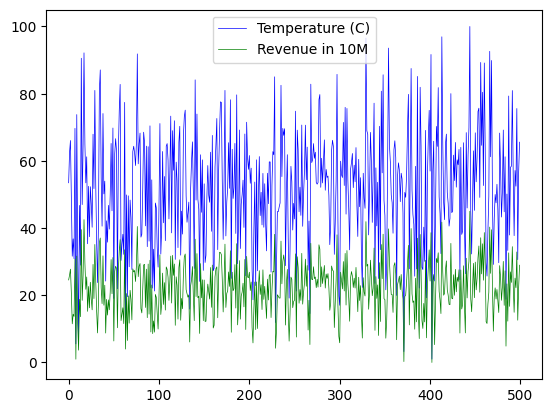

In [ ]:
df = pd.read_csv("/content/IceCreamData.csv")
plt.figure(1)
plt.plot(df['Revenue']/10,color='b',linewidth=0.5)
plt.plot(df['Temperature'],color='g',linewidth=0.5)
plt.legend(["Temperature (C)", "Revenue in 10M"])

In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
# to plot the scatter plot
def scatterplot(slope, intercept, x , y):
    x_vals = np.linspace(min(x)-10,max(x)+10,100)
    y_vals = intercept + slope * x_vals
    plt.subplot()
    color = np.random.rand(100)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot')
    plt.plot(x_vals, y_vals,color='b')
    plt.scatter(x,y,s=30,c=color,alpha=0.6)
    plt.show()

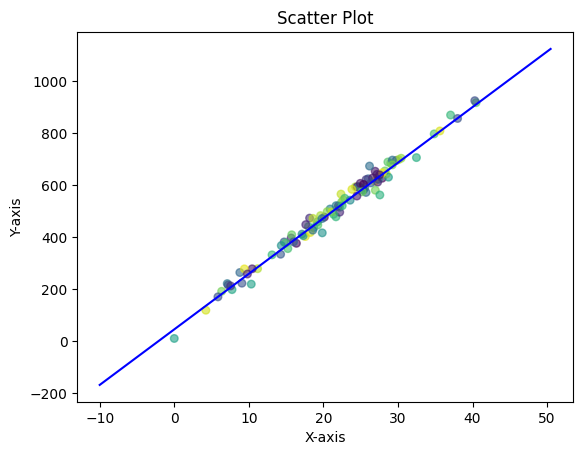

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(df['Temperature'],df['Revenue'],test_size=0.2)
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
c,m=[model.intercept_[0],model.coef_[0][0]]
scatterplot(m,c,x_test,y_test)

In [ ]:
# to compute the correlation
correlation_matrix = np.corrcoef(x_test, y_test)
correlation_coefficient = correlation_matrix[0, 1]
print("Correlation coefficient: ", correlation_coefficient)


Correlation coefficient:  0.9924539782746485


In [ ]:
# train test split with 80:20 ratio
df = pd.read_csv("/content/IceCreamData.csv")
x = df['Temperature']
y = df['Revenue']
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

print("Train set length:", len(x_train))
print("Test set length:", len(x_test))

Train set length: 400
Test set length: 100


In [ ]:
# to fit linear regression model on the train and to report the parameters
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[21.40355639]]
Intercept: [45.07057777]


In [ ]:
# to compute accuracy
import numpy as np
predictions = model.predict(x_test.values.reshape(-1, 1)).flatten()
threshold = 0.1
accuracy = np.mean(np.abs(predictions - y_test.values.flatten()) <= threshold) * 100
print("Accuracy (within threshold):", accuracy, "%")

Accuracy (within threshold): 1.0 %


In [ ]:
#predict the value of the revenue for the temperature =20
temperature = 20
coefficients = model.coef_
intercept = model.intercept_
predicted_revenue = coefficients * temperature + intercept
print("Predicted Revenue: ", predicted_revenue[0])

Predicted Revenue:  [474.39664628]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


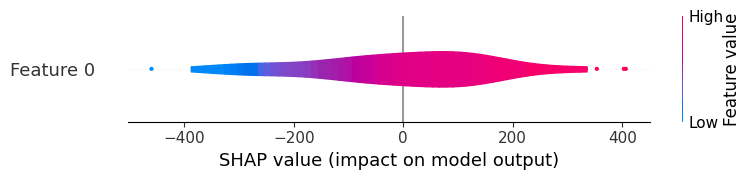

In [ ]:
explainer = shap.Explainer(model.predict, x_test.values.reshape(-1,1))
shap_values = explainer( x_test.values.reshape(-1,1))
shap.summary_plot(shap_values,plot_type='violin')